In [6]:
import pandas as pd

NAIVE_PATH = 'naive_periodic_experiment'
EXP_DATE = '2024-02-03T22:06:48'

results = {}

for result_file in ['total_X.csv', 'minimal_with_univariate.csv', 'per_switch.csv', 'per_X_flow.csv', 'per_X_port.csv']:
    results[result_file] = pd.read_csv(f'{NAIVE_PATH}/{EXP_DATE}/{result_file}',header=0)

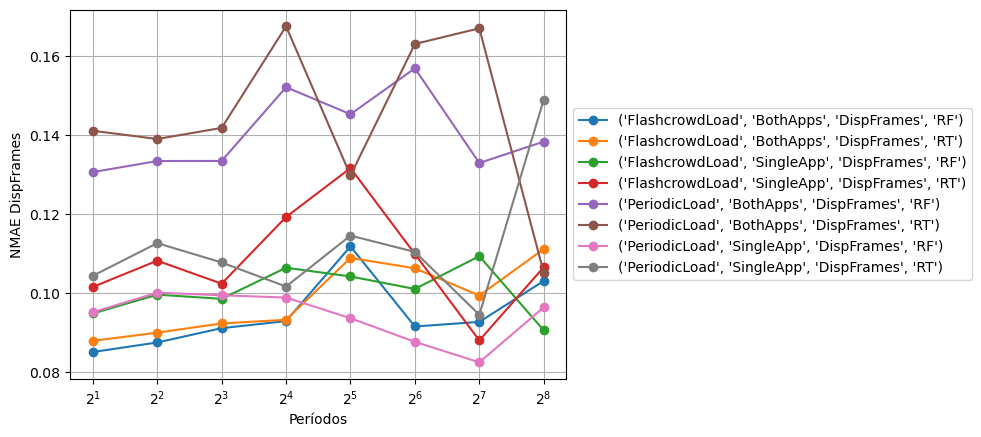

In [7]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

#df_with_dispframes_and_reads = results['total_X.csv'][results['total_X.csv']['feature'] != 'noAudioPlayed']
#df_with_dispframes_and_reads = df_with_dispframes_and_reads[df_with_dispframes_and_reads['feature'] != 'WritesAvg']
df_with_dispframes =  results['total_X.csv'][results['total_X.csv']['feature'] == 'DispFrames']


grouped_df = df_with_dispframes.groupby(['carga', 'apps', 'feature', 'método'])

for carga_group, group_data in grouped_df:
    plt.plot(group_data['período'], group_data['nmae'], label=carga_group, drawstyle='default', marker='o')
plt.xscale('log', base=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Períodos')
plt.ylabel('NMAE DispFrames')
plt.grid(True)

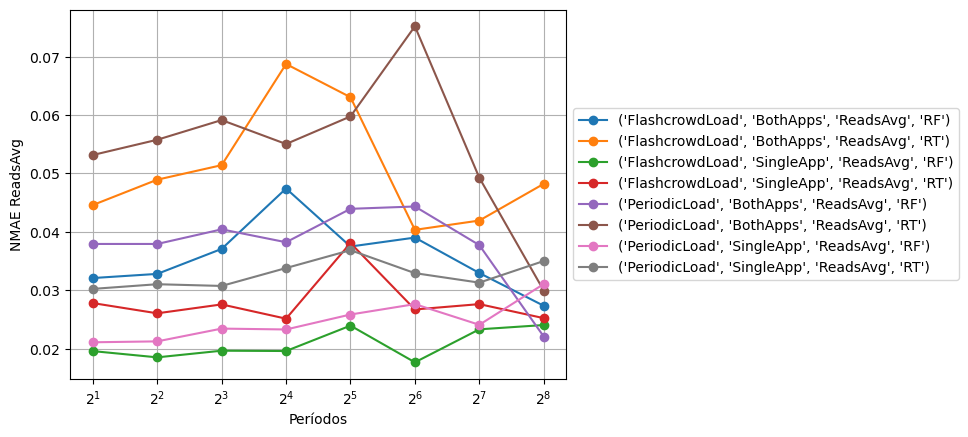

In [8]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

df_with_reads =  results['total_X.csv'][results['total_X.csv']['feature'] == 'ReadsAvg']

grouped_df = df_with_reads.groupby(['carga', 'apps', 'feature', 'método'])

for carga_group, group_data in grouped_df:
    plt.plot(group_data['período'], group_data['nmae'], label=carga_group, drawstyle='default', marker='o')
plt.xscale('log', base=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Períodos')
plt.ylabel('NMAE ReadsAvg')
plt.grid(True)

In [9]:
df_with_reads[df_with_reads['período'] == 2]

,período,carga,apps,feature,método,nmae,Unnamed: 6
128,2,FlashcrowdLoad,BothApps,ReadsAvg,RT,0.044605,NaN
129,2,FlashcrowdLoad,BothApps,ReadsAvg,RF,0.032120,NaN
160,2,PeriodicLoad,BothApps,ReadsAvg,RT,0.053160,NaN
161,2,PeriodicLoad,BothApps,ReadsAvg,RF,0.037950,NaN
192,2,FlashcrowdLoad,SingleApp,ReadsAvg,RT,0.027839,NaN
193,2,FlashcrowdLoad,SingleApp,ReadsAvg,RF,0.019628,NaN
224,2,PeriodicLoad,SingleApp,ReadsAvg,RT,0.030265,NaN
225,2,PeriodicLoad,SingleApp,ReadsAvg,RF,0.021137,NaN


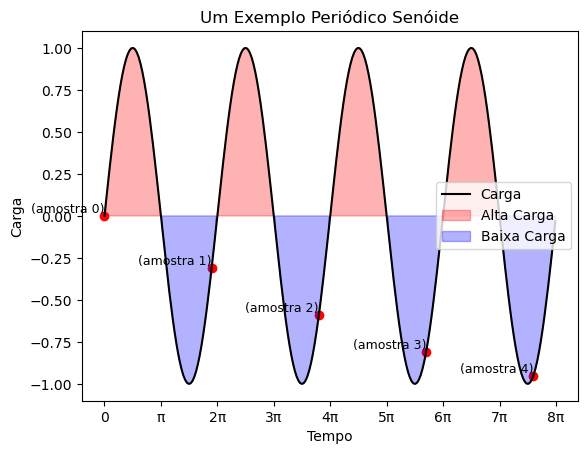

In [150]:
# eventos importantes em outliers
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 8 * np.pi, 0.1) 
y = np.sin(x)

plt.plot(x, y, color='black', label='Carga')

plt.xticks(np.arange(0, 8 * np.pi + 1, np.pi), ['0', 'π', '2π', '3π', '4π', '5π', '6π', '7π', '8π'])
threshold_high = 0
threshold_low = 0

for i in range(5):
    xi = .95 * i * 2 * np.pi
    yi = np.sin(xi)
    plt.scatter(xi, yi, color='red') 
    plt.text(xi, yi, f'(amostra {i})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)

plt.fill_between(x, y, threshold_high, where=(y > threshold_high), color='red', alpha=0.3, label='Alta Carga')
plt.fill_between(x, y, threshold_low, where=(y < threshold_low), color='blue', alpha=0.3, label='Baixa Carga')

plt.xlabel('Tempo')
plt.ylabel('Carga')
plt.title('Um Exemplo Periódico Senóide')

plt.legend()
plt.show()

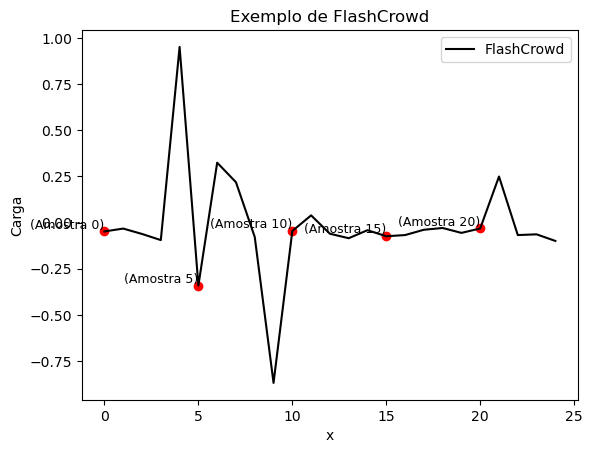

In [161]:
import numpy as np
import matplotlib.pyplot as plt

def spike_function(x):
    if np.random.rand() > 0.75:
        return np.random.choice([-1, 1]) * np.random.rand()
    else:
        return (np.random.rand() - 1)/10

x = np.arange(0, 25)
y = np.array([spike_function(xi) for xi in x])

plt.plot(x, y, color='black', label='FlashCrowd')

for i in range(len(x)):
    if i % 5 == 0:
        plt.scatter(x[i], y[i], color='red', marker='o')
        plt.text(x[i], y[i], f'(Amostra {i})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
plt.xlabel('x')
plt.ylabel('Carga')
plt.title('Exemplo de FlashCrowd')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
from dataset_management import parse_traces

x, y = parse_traces('KV-SingleApp-PeriodicLoad', 'ReadsAvg', ['X_cluster.csv', 'X_flow.csv', 'X_port.csv'], nrows=None)

In [ ]:
size(x)

[]

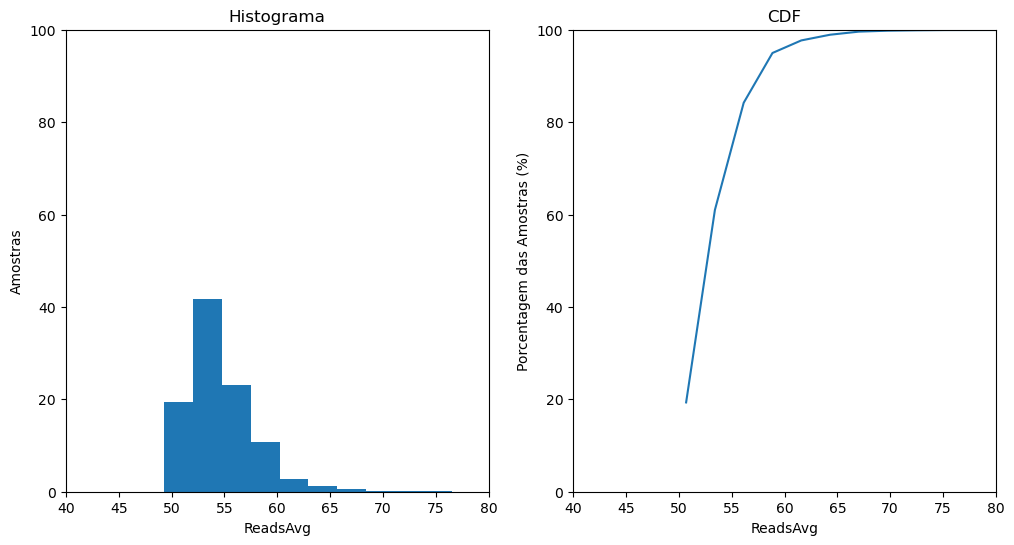

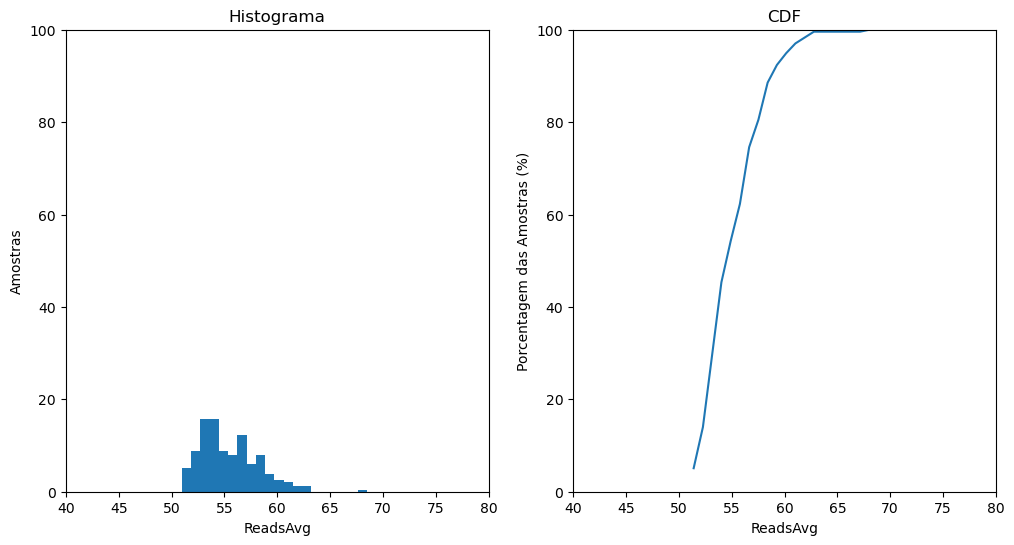

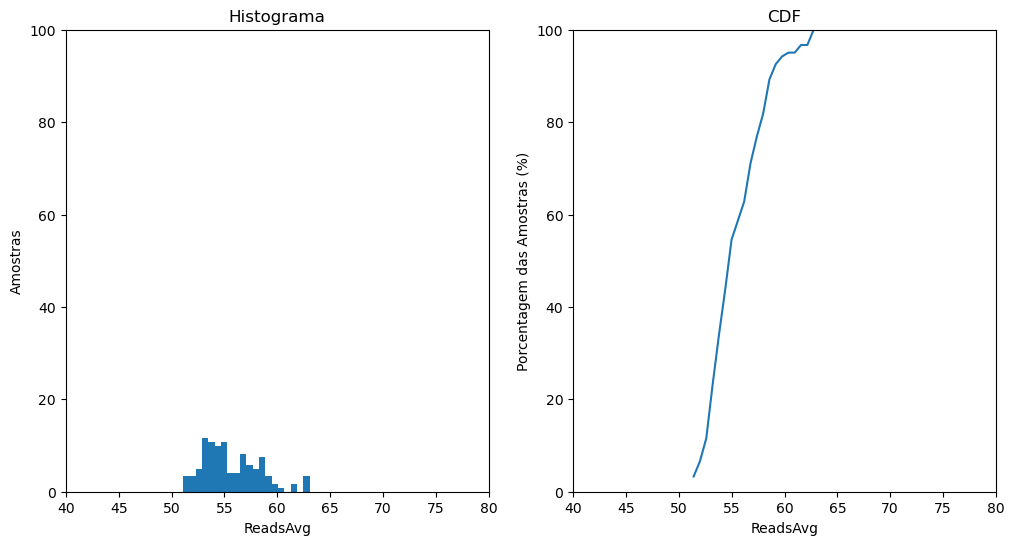

In [27]:
import numpy as np
y_metric = 'ReadsAvg'
for period in [1,128,256]:
    x_filtered = x[x.index % period == 0]
    y_filtered = y[y.index % period == 0]
    
    hist, bins = np.histogram(
        y_filtered, bins=20)
    hist = hist / np.sum(hist) * 100
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]))
    plt.title('Histograma')
    plt.ylabel('Amostras')
    plt.xlabel(y_metric)
    plt.ylim(0, 100)
    plt.xlim(40, 80)
    
    cdf = np.cumsum(hist)
    
    plt.subplot(1, 2, 2)
    plt.plot(bins[:-1], cdf)
    plt.title('CDF')
    plt.ylabel('Porcentagem das Amostras (%)')
    plt.xlabel(y_metric)
    plt.ylim(0, 100)
    plt.xlim(40, 80)
plt.plot()
    #plt.savefig(
    #    f'{BASE_RESULTS_PATH}/{period}_{trace}_{y_metric}_dataset.png')
